# Information Retrieval

Bag of Words and TF-IDF

## 1 - Library Imports

In [3]:
%reset -f

# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)
TEST_DIR = os.path.join(ROOT_DIR, "test-white-papers")


# Import own functions
from libraries import corpus
from libraries import pdf2text

import warnings
warnings.filterwarnings("ignore")

##########################
# Import other libraries
##########################

# Data Manipulation
import numpy as np
import pandas as pd
import re

# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Natural Language Processing libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk import bigrams, ngrams

import string # for punctuation
import gc

# Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# To reload own libraries when a change is made
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'D:\\Dropbox\\Masters\\BIPM\\2 Semester\\Text, Web and Social Media Analytics\\Project\\datascience_project\\libraries\\corpus.py'>

## 2 - Data Preprocessing

In [4]:
# Retrieving the PDF files from white-paper folder and converting them to text
dataset = pdf2text.get_dataset()

2019-07-08 09:09:39,204 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar to /var/folders/57/_yzmvkvn2bxcy9h0r2tprdz80000gn/T/tika-server.jar.
2019-07-08 09:09:54,602 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar.md5 to /var/folders/57/_yzmvkvn2bxcy9h0r2tprdz80000gn/T/tika-server.jar.md5.
2019-07-08 09:09:55,069 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [5]:
# Print all the white papers' names
dataset.keys()

dict_keys(['utrust', 'ark', 'bitcoin', 'icon', 'basicattentiontoken', 'dash', 'bytecoin', 'horizen', 'abbccoin', 'komodo', 'hyperion', 'tezos', 'nexo', 'dai', 'tron', 'fantom', 'digixdao', 'cryptonex', 'maker', 'bytom', 'metal', 'dogecoin', 'pundix', 'japancontenttoken', 'cosmos', 'latoken', 'nem', 'maidsafecoin', 'decentraland', 'mixin', 'stellar', 'elastos', 'gxchain', 'nebulas', 'solve', 'eos', 'theta', 'stratis', 'tether', 'iexecrlc', 'orbs', 'dent', 'ethereum', 'vechain', 'hypercash', 'bitcoingold', 'status', 'ravencoin', 'thetafuel', 'zilliqa', 'celernetwork', 'omisego', 'singularitynet', 'usdcoin', 'holo', 'synthetixnetworktoken', 'bitshares', '0x', 'nkn', 'riftoken', 'waves', '#metahash', 'powerledger', 'siacoin', 'wanchain', 'enjincoin', 'loopring', 'factom', 'crypto', 'ontology', 'particl', 'metaverseetp', 'zcash', 'aion', 'skycoin', 'iota', 'binancecoin', 'chainlink', 'wax', 'bhpcoin', 'bittorrent', 'paxosstandardtoken', 'thundertoken', 'inocoin', 'apollocurrency', 'cosmocoi

In [6]:
# Size of corpus
len(dataset.keys())

99

In [6]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora_sent = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

Cleaning: #metahash


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: metal
Cleaning: metaver

In [7]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_whole = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

Cleaning: #metahash


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: metal
Cleaning: metaver

## 3 - Methods Application

### Tokenization

Tokenization is the first step. The text documents will be broken down into small pieces, in this case words. These tokenized words are called tokens. 

In [8]:
# Define function
def tokenization(corpus, protocol):
    """
    Function that receives a name of a protocol and return the tokens.
    Input:
        Name of protocol
    Output:
        Tokens
    """
    assert protocol in corpus.keys()
    
    # Start tokenizing the dataset
    tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)

    if makeSentences:
        #############################################
        # Tokenization on sentences for a specific 
        tokens = [tokenizer.tokenize(s) for s in corpus[protocol]]
        # Flatten the list
        tokens = np.reshape(np.concatenate(tokens), -1)
        #############################################
    else:
        #############################################
        # Tokenization on whole corpus (no sentences)
        tokens = tokenizer.tokenize(corpus[protocol])
        #############################################

    print('We have', len(tokens), 'words in total. \n')
    print(tokens[5:10])
    
    return tokens

### Frequency Distribution

The FreqDist can quickly show how frequent a word occurs in the coprus. Frequency Distribution enables to define the most informative words about the topic of the text document.
https://www.nltk.org/book/ch01.html

In [9]:
# Get tokens for a specific white paper
tokens = tokenization(corpora_whole, "bitcoin")

# Create the object with all the tokens
fdist = FreqDist(tokens)
fdist.most_common(10)

We have 1486 words in total. 

['purely', 'peertopeer', 'version', 'electronic', 'cash']


[('block', 46),
 ('hash', 42),
 ('transaction', 36),
 ('transactions', 33),
 ('nodes', 31),
 ('chain', 25),
 ('network', 21),
 ('attacker', 19),
 ('blocks', 19),
 ('proofofwork', 18)]

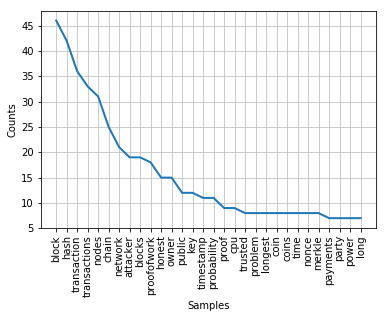

In [10]:
fdist.plot(30,cumulative=False)
plt.show()

### N-grams

N-grams is a sequence of N words. Extracting a list of word pairs from a text is known as bigrams. N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. So here we are answering the question – how far back in the history of a sequence of words should we go to predict the next word?

In [11]:
def ngrams(tokens, n = 2):
    
    assert n > 1
    
    if n == 2:
        bigrams_tokens = bigrams(tokens)
        fdist_bigrams = FreqDist(list(bigrams_tokens))
        fdist_bigrams.plot(30,cumulative=False)
        plt.show()
    if n == 3:
        trigrams_tokens = ngrams(tokens, 3)
        fdist_trigrams = FreqDist(list(trigrams_tokens))
        fdist_trigrams.plot(30,cumulative=False)
        plt.show()
    if n > 3:
        grams_tokens = ngrams(tokens, n)
        fdist_grams = FreqDist(list(grams_tokens))
        fdist_grams.plot(30,cumulative=False)
        plt.show()

### Bag of Words / Word Cloud

A popular and simple method of feature extraction with text data is called the bag-of-words model of text. The feature_extraction module from scikit-learn to create bag-of-words features is used below.

In [12]:
def bag_words(corpus, protocol):

    # Initialize a CountVectorizer object: count_vectorizer
    count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                                ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

    text = [corpus[protocol]]
    # Transforms the data into a bag of words
    count_train = count_vec.fit(text)
    bag_of_words = count_vec.transform(text)
    
    return bag_of_words, count_vec


In [28]:
def word_cloud(corpus,protocol):
    text = corpus[protocol]
    wordcloud = WordCloud(background_color="white",
                          stopwords = set(STOPWORDS)
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

## 4 - Outcome

### Input

In [14]:
testset = pdf2text.get_dataset(path=TEST_DIR)
testset.keys()

dict_keys(['adcoin', 'budbo', 'kwattcoin', 'oceanprotocol'])

In [19]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test = corpus.makeCleanCorpus(testset, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: adcoin
Cleaning: budbo
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


### Model/Method

#### Adcoin

We have 1310 words in total. 

['technological', 'advancement', 'adopt', 'blockchain', 'literally']


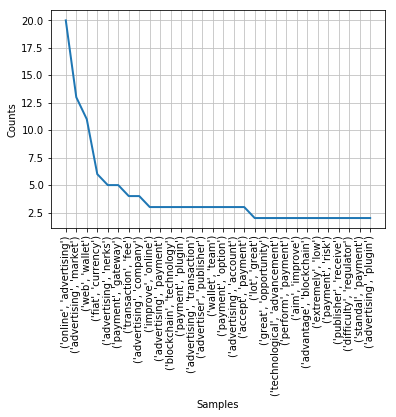

In [20]:
tokens = tokenization(corpora_test, "adcoin")

ngrams(tokens,2)

In [21]:
bag, vect = bag_words(corpora_test,"adcoin")

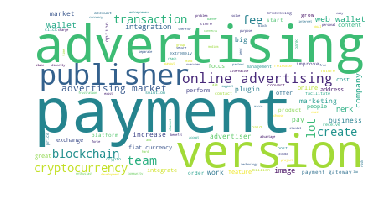

In [29]:
word_cloud(corpora_test,"adcoin")

# 5 - Inspiration 

- https://www.kaggle.com/rochachan/part-1-for-beginners-bag-of-words
- 'Bag_of_Words_tfidf_Simple_PreProcessing.ipynb' notebook by Prof. Löcher
- https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
- https://honingds.com/blog/natural-language-processing-with-python/
- https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis
- https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/